<a href="https://colab.research.google.com/github/achellesheel/blogpc114/blob/main/cinema_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
# Download data from IMDB website
 # Data description https://www.imdb.com/interfaces/
movies = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', compression='gzip', sep='\t')
print('"title.basics.tsv.gz" downloaded')
ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', compression='gzip', sep='\t')
print('"title.ratings.tsv.gz" downloaded')
print(movies.shape)
print(ratings.shape)

In [ ]:
#Merge data on 'tconst’, which is unique id for any title in IMDB database.
import pandas as pd
movies = pd.merge(movies, ratings, on='tconst')
print(movies.shape)

(1524996, 11)


In [ ]:
print(movies['titleType'].unique())


['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [ ]:
movies = movies[movies['titleType'].isin(['movie', 'tvMovie'])]
print(movies.shape)

(378655, 11)


In [ ]:
genres = movies['genres'].unique()
len(genres)

1347

In [ ]:
movies = movies[movies['genres'].str.contains('Documentary') == False]


In [ ]:
movies = movies[['startYear', 'runtimeMinutes', 'numVotes']]


In [ ]:
for column in movies.columns.values.tolist():
    movies[column] = pd.to_numeric(movies[column], errors='coerce')

movies = movies.dropna()
print(movies.shape)

(276996, 3)


In [ ]:
print(movies.describe())


           startYear  runtimeMinutes      numVotes
count  276996.000000   276996.000000  2.769960e+05
mean     1993.763787       95.374850  4.227613e+03
std        26.029901      117.960703  3.954265e+04
min      1894.000000        1.000000  5.000000e+00
25%      1977.000000       83.000000  2.500000e+01
50%      2002.000000       92.000000  9.000000e+01
75%      2015.000000      104.000000  4.470000e+02
max      2025.000000    59460.000000  2.993953e+06


In [ ]:
movies = movies[movies['runtimeMinutes'] > 40]


In [ ]:
movies = movies[movies['numVotes'] >= 1000]
print(movies.describe())

          startYear  runtimeMinutes      numVotes
count  45057.000000    45057.000000  4.505700e+04
mean    1999.887343      104.845862  2.519760e+04
std       22.536687       22.697008  9.532699e+04
min     1911.000000       41.000000  1.000000e+03
25%     1989.000000       90.000000  1.647000e+03
50%     2008.000000      100.000000  3.236000e+03
75%     2017.000000      115.000000  1.028000e+04
max     2025.000000      776.000000  2.993953e+06


In [ ]:
movies.to_csv('movies.csv', index=False)
print('Success!')

Success!


In [ ]:
import pandas as pd, \
matplotlib.pyplot as plt, \
matplotlib.patches as mpatches, \
matplotlib.lines as mlines, \
seaborn as sns
movies = pd.read_csv('movies.csv')

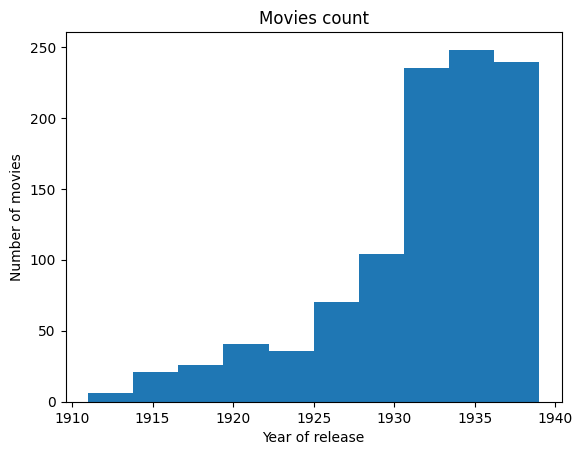

In [ ]:
plt.hist(movies['startYear'][movies['startYear'] < 1940])
plt.title('Movies count')
plt.xlabel('Year of release')
plt.ylabel('Number of movies')
plt.show()

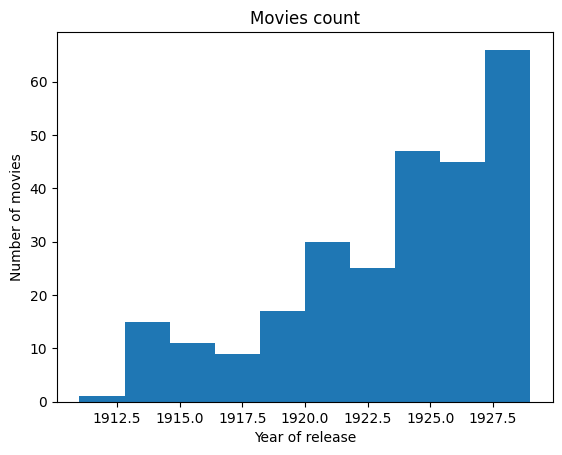

In [ ]:
plt.hist(movies['startYear'][movies['startYear'] < 1930])
plt.title('Movies count')
plt.xlabel('Year of release')
plt.ylabel('Number of movies')
plt.show()



In [ ]:
print(movies['startYear'][movies['startYear'] < 1940].value_counts().sort_index())

startYear
1911.0     1
1913.0     5
1914.0    10
1915.0     7
1916.0     4
1917.0     3
1918.0     6
1919.0    17
1920.0    15
1921.0    15
1922.0    11
1923.0    14
1924.0    22
1925.0    25
1926.0    20
1927.0    25
1928.0    36
1929.0    30
1930.0    38
1931.0    67
1932.0    86
1933.0    82
1934.0    81
1935.0    82
1936.0    85
1937.0    77
1938.0    68
1939.0    94
Name: count, dtype: int64


In [ ]:
# Count movies per year and create a DataFrame.
movies_per_year = movies['startYear'].value_counts().sort_index()
movies_per_year_df = pd.DataFrame({'year': movies_per_year.index, 'movie_count': movies_per_year.values})

# Initialize start_year.
start_year = 0

# Iterate through the DataFrame rows.
for i in range(len(movies_per_year_df)):
    year = movies_per_year_df.iloc[i, 0]
    movie_count = movies_per_year_df.iloc[i, 1]
    start_year = year
    # Check if the current year has more than 30 movies.
    if movie_count > 30:
        break

print(start_year)


1928.0


In [ ]:
movies = movies[movies['startYear'] >= 1931]
print(movies.describe())

          startYear  runtimeMinutes      numVotes
count  44753.000000    44753.000000  4.475300e+04
mean    2000.400241      104.906911  2.532056e+04
std       21.730389       22.493154  9.562518e+04
min     1931.000000       41.000000  1.000000e+03
25%     1990.000000       90.000000  1.651000e+03
50%     2008.000000      100.000000  3.246000e+03
75%     2017.000000      115.000000  1.035000e+04
max     2025.000000      776.000000  2.993953e+06


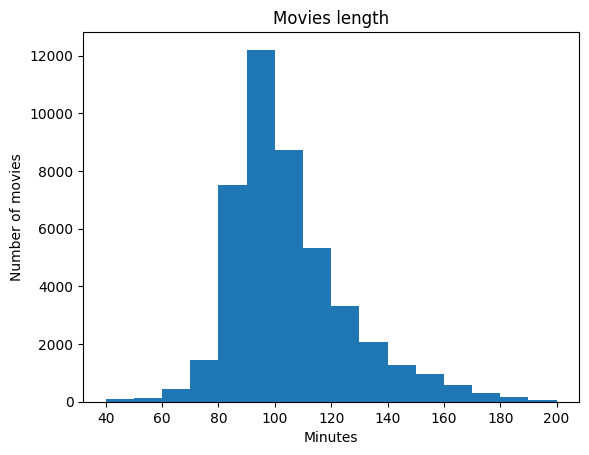

In [ ]:
plt.hist(movies['runtimeMinutes'], range=(40, 200), bins=16, ec='black')
plt.title('Movies length')
plt.xlabel('Minutes')
plt.ylabel('Number of movies')
plt.show()

In [ ]:
statistics_grouped = movies['runtimeMinutes'].groupby(movies['startYear']).describe()

In [ ]:
avg_runtime_by_year = statistics_grouped['mean']  # Mean
avg_runtime_lower_band = statistics_grouped['mean'] - statistics_grouped['std']  # Lower band of data created using standard deviation.
avg_runtime_upper_band = statistics_grouped['mean'] + statistics_grouped['std']  # Upper band of data.

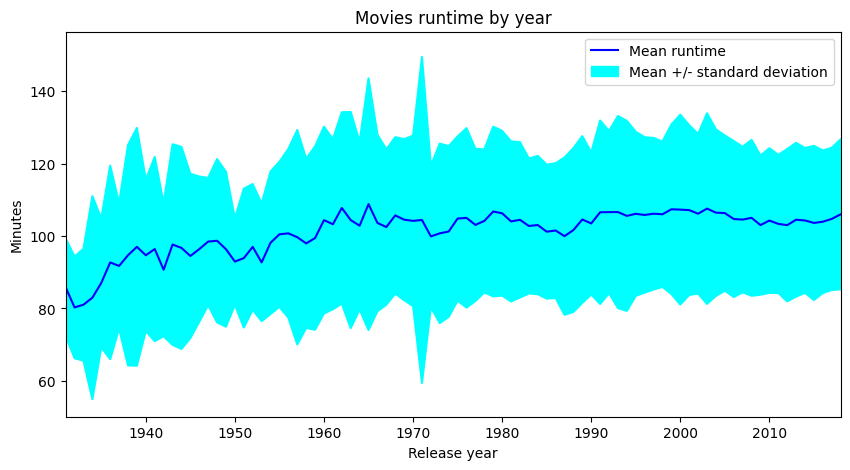

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(avg_runtime_by_year, color="blue")
ax1.plot(avg_runtime_lower_band, color="aqua")
ax1.plot(avg_runtime_upper_band, color="aqua")
ax1.fill_between(statistics_grouped.index, avg_runtime_lower_band, avg_runtime_upper_band, facecolor='aqua')  # Fill space between bands to create confidence interval.
ax1.set_title('Movies runtime by year')
ax1.set_ylabel('Minutes')
ax1.set_xlabel('Release year')
ax1.set_xlim(1931, 2018)
legend_sd = mpatches.Patch(color='aqua', label='Mean +/- standard deviation')  # Used mpatches to create rectangular for a legend.
legend_line = mlines.Line2D([], [], color='blue', label='Mean runtime')
ax1.legend(handles=[legend_line, legend_sd])  # Nice legend with rectangular and line.
plt.show()

In [ ]:
percentage_of_included_movies = []
for year in statistics_grouped.index:
    movies_from_year = movies[movies['startYear'] == year]
    avg_runtime_low = avg_runtime_lower_band[int(year)]
    avg_runtime_up = avg_runtime_upper_band[int(year)]
    movies_included = movies_from_year[movies_from_year['runtimeMinutes'] > avg_runtime_low][movies_from_year['runtimeMinutes'] < avg_runtime_up]
    percentage_of_included_movies.append(len(movies_included)/len(movies_from_year))

C:\Users\PRANAV CHATURVEDI\AppData\Local\Temp\ipykernel_16096\2482360591.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_included = movies_from_year[movies_from_year['runtimeMinutes'] > avg_runtime_low][movies_from_year['runtimeMinutes'] < avg_runtime_up]
C:\Users\PRANAV CHATURVEDI\AppData\Local\Temp\ipykernel_16096\2482360591.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_included = movies_from_year[movies_from_year['runtimeMinutes'] > avg_runtime_low][movies_from_year['runtimeMinutes'] < avg_runtime_up]
C:\Users\PRANAV CHATURVEDI\AppData\Local\Temp\ipykernel_16096\2482360591.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_included = movies_from_year[movies_from_year['runtimeMinutes'] > avg_runtime_low][movies_from_year['runtimeMinutes'] < avg_runtime_up]
C:\Users\PRANAV CHATURVEDI\AppData\Local\Temp\ipykernel_16096\2482360591.py:6: UserWarning: Boolean Ser

In [ ]:
statistics_grouped['included_movies_perc'] = percentage_of_included_movies
print(statistics_grouped['included_movies_perc'].describe())

count    95.000000
mean      0.786209
std       0.064329
min       0.611111
25%       0.751033
50%       0.795139
75%       0.827601
max       0.967391
Name: included_movies_perc, dtype: float64


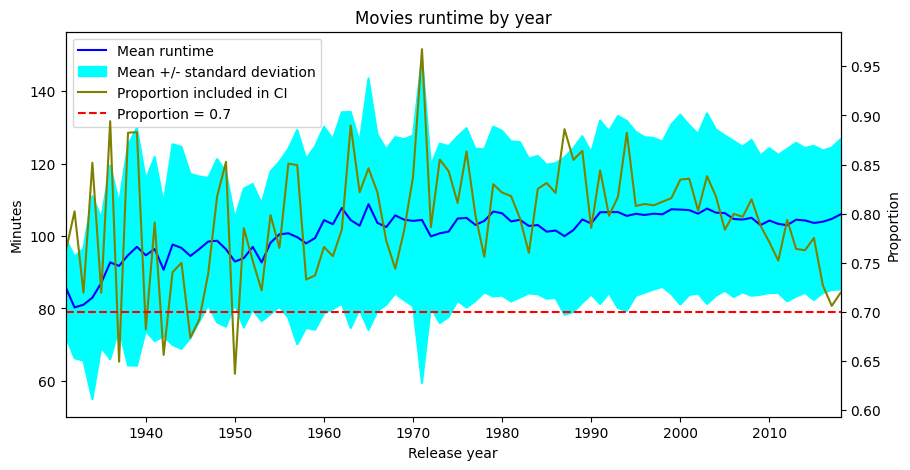

In [ ]:
# Main plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(avg_runtime_by_year, color="blue")
ax1.plot(avg_runtime_lower_band, color="aqua")
ax1.plot(avg_runtime_upper_band, color="aqua")
ax1.fill_between(statistics_grouped.index, avg_runtime_lower_band, avg_runtime_upper_band, facecolor='aqua')
ax1.set_title('Movies runtime by year')
ax1.set_ylabel('Minutes')
ax1.set_xlabel('Release year')
ax1.set_xlim(1931, 2018)
# Plot with proportions
ax2 = ax1.twinx()
ax2.plot(statistics_grouped['included_movies_perc'], color='olive')
ax2.set_ylabel('Proportion')
plt.axhline(y=0.70, color='red', linestyle='dashed')  # Add line at 0.70
legend_sd = mpatches.Patch(color='aqua', label='Mean +/- standard deviation')
legend_line = mlines.Line2D([], [], color='blue', label='Mean runtime')
legend_line_2 = mlines.Line2D([], [], color='olive', label='Proportion included in CI')
dashed_line = mlines.Line2D([], [], color='red', label='Proportion = 0.7', linestyle='dashed')
ax1.legend(handles=[legend_line, legend_sd, legend_line_2, dashed_line])
plt.show()

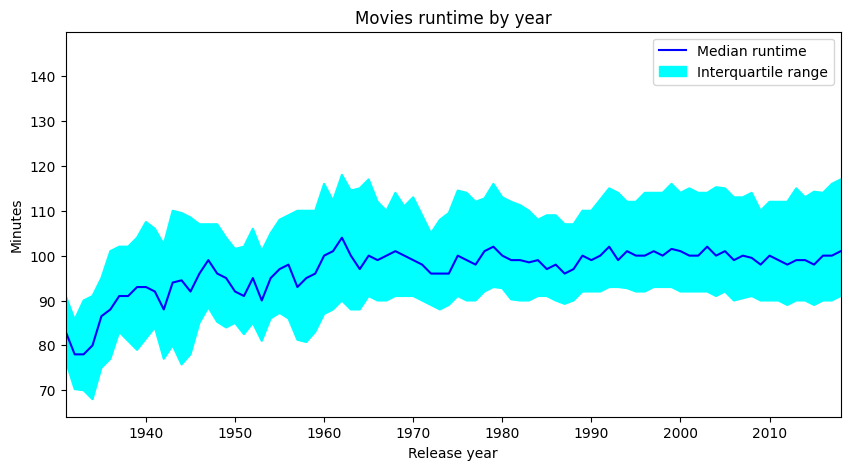

In [ ]:
# Data
avg_runtime_by_year = statistics_grouped['50%']
avg_runtime_lower_band = statistics_grouped['25%']
avg_runtime_upper_band = statistics_grouped['75%']

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(avg_runtime_by_year, color="blue")
ax1.plot(avg_runtime_lower_band, color="aqua")
ax1.plot(avg_runtime_upper_band, color="aqua")
ax1.fill_between(statistics_grouped.index, avg_runtime_lower_band, avg_runtime_upper_band, facecolor='aqua')
ax1.set_title('Movies runtime by year')
ax1.set_ylabel('Minutes')
ax1.set_xlabel('Release year')
ax1.set_xlim(1931, 2018)
legend_sd = mpatches.Patch(color='aqua', label='Interquartile range')
legend_line = mlines.Line2D([], [], color='blue', label='Median runtime')
ax1.legend(handles=[legend_line, legend_sd])
plt.show()

In [ ]:

movies_since_1960 = movies[movies['startYear'] >= 1960]



In [ ]:
def top_n_movies(data, n):
    top_n_movies_per_year = data.groupby('startYear').head(n)
    stats = top_n_movies_per_year['runtimeMinutes'].groupby(
        top_n_movies_per_year['startYear']).describe()
    return stats

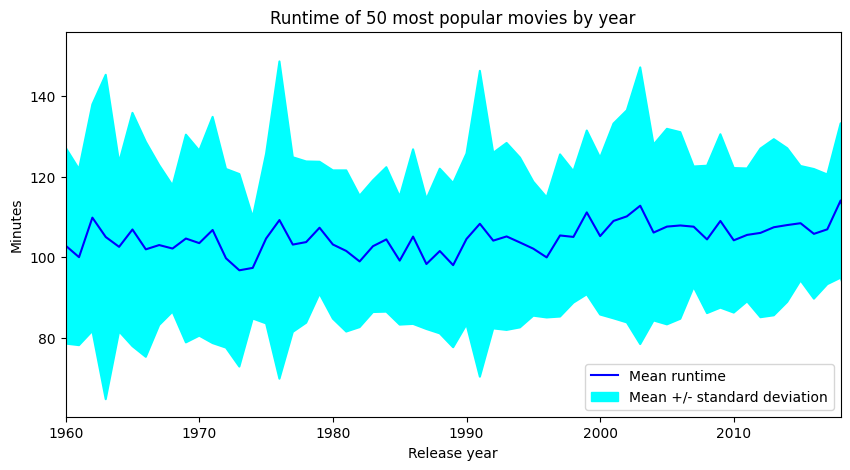

In [ ]:
statistics_grouped_50 = top_n_movies(movies_since_1960, 50)
# Data
avg_runtime_by_year = statistics_grouped_50['mean']
avg_runtime_lower_band = statistics_grouped_50['mean'] - statistics_grouped_50['std']
avg_runtime_upper_band = statistics_grouped_50['mean'] + statistics_grouped_50['std']

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(avg_runtime_by_year, color="blue")
ax1.plot(avg_runtime_lower_band, color="aqua")
ax1.plot(avg_runtime_upper_band, color="aqua")
ax1.fill_between(statistics_grouped_50.index, avg_runtime_lower_band, avg_runtime_upper_band, facecolor='aqua')
ax1.set_title('Runtime of 50 most popular movies by year')
ax1.set_ylabel('Minutes')
ax1.set_xlabel('Release year')
ax1.set_xlim(1960, 2018)
legend_sd = mpatches.Patch(color='aqua', label='Mean +/- standard deviation')
legend_line = mlines.Line2D([], [], color='blue', label='Mean runtime')
ax1.legend(handles=[legend_line, legend_sd])
plt.show()

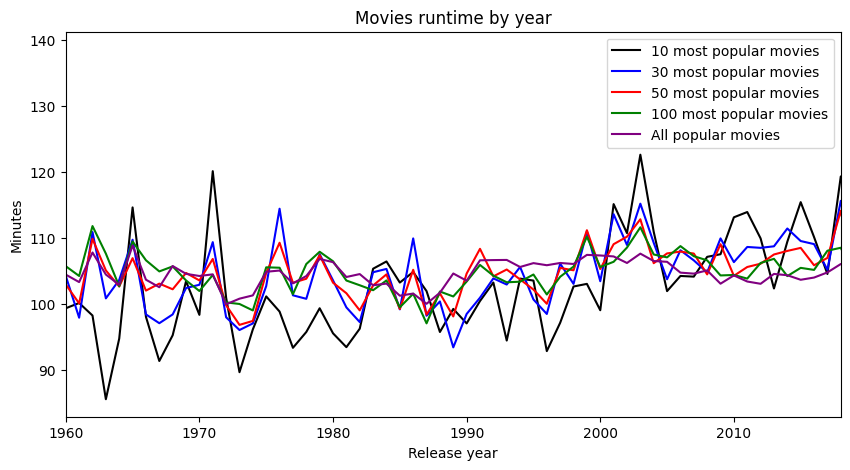

In [ ]:
mean_10 = top_n_movies(movies_since_1960, 10)['mean']
mean_30 = top_n_movies(movies_since_1960, 30)['mean']
mean_50 = top_n_movies(movies_since_1960, 50)['mean']
mean_100 = top_n_movies(movies_since_1960, 100)['mean']
mean_all = top_n_movies(movies_since_1960, len(movies_since_1960))['mean']
# Chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mean_10, color='black')
ax.plot(mean_30, color='blue')
ax.plot(mean_50, color='red')
ax.plot(mean_100, color='green')
ax.plot(mean_all, color='purple')
ax.set_title('Movies runtime by year')
ax.set_ylabel('Minutes')
ax.set_xlabel('Release year')
ax.set_xlim(1960, 2018)
ax.legend(labels=['10 most popular movies',
                  '30 most popular movies',
                  '50 most popular movies',
                  '100 most popular movies',
                  'All popular movies'])
plt.show()

In [ ]:
import pandas as pd

# Initialize an empty Series with a name and dtype
total_mean = pd.Series(dtype=float)

# Example mean values and indices
mean_list = [mean_10, mean_30, mean_50, mean_100, mean_all]
index_list = ['top_10', 'top_30', 'top_50', 'top_100', 'all']

# Loop through and concatenate Series
for i in range(5):
    mean_n = pd.Series([mean_list[i].mean()], index=[index_list[i]])
    total_mean = pd.concat([total_mean, mean_n])

print(total_mean)


top_10     103.950000
top_30     105.254377
top_50     105.560741
top_100    105.708771
all        105.404999
dtype: float64


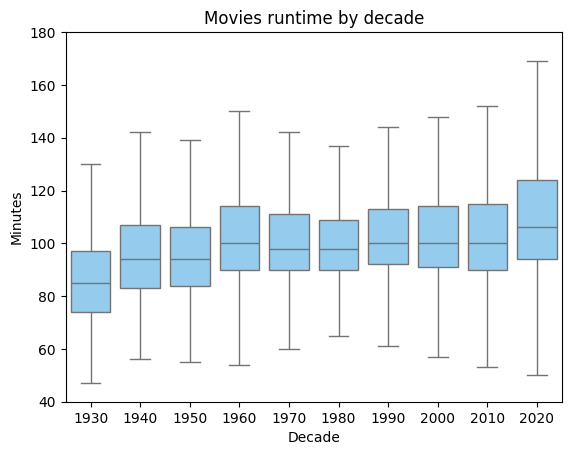

In [ ]:
movies_by_decade = movies.copy()
movies_by_decade['startYear'] = ((movies_by_decade['startYear'] // 10) * 10).astype('int64')
sns.boxplot(x="startYear", y="runtimeMinutes", data=movies_by_decade, color='lightskyblue', showfliers=False)
plt.ylim(40,180)
plt.title('Movies runtime by decade')
plt.xlabel('Decade')
plt.ylabel('Minutes')
plt.show()